In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 

In [27]:
#! rm -fr food_mnist
! git clone https://github.com/srohit0/food_mnist.git

import food_mnist

(train_images, train_labels),(test_images, test_labels) = food_mnist.load_data()
#(3750, 224, 224, 3),        (1250,224,224,3)

fatal: destination path 'food_mnist' already exists and is not an empty directory.


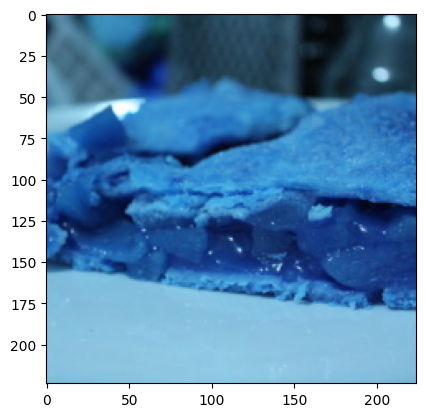

Cai nay la: 0


In [28]:
hinh = train_images[20]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[20])

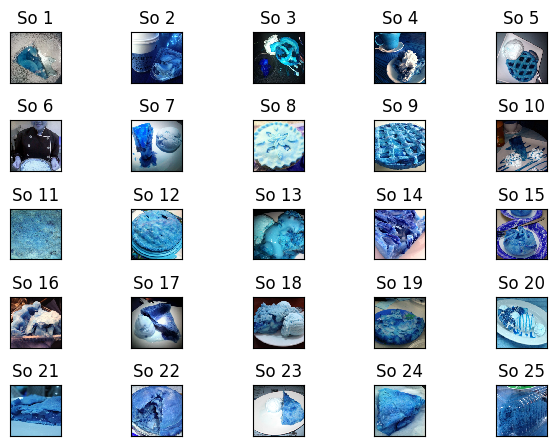

In [29]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title(f"So {i+1}")
    plt.xticks([])
    plt.yticks([])


In [30]:
model = Sequential()

model.add(Dense(128, activation= 'relu', input_shape= (224*224,))) #Gia tri toi uu
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               6422656   
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,440,458
Trainable params: 6,440,458
Non-trainable params: 0
_________________________________________________________________


In [33]:
train_images = train_images.reshape((3750, 224*224*3))
train_images = train_images.astype('float32')/255

In [35]:
test_images = test_images.reshape((1250, 224*224*3))
test_images = test_images.astype('float32')/255

In [8]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [9]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 20)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
188/188 [==============================] - 62s 326ms/step - loss: 15.4216 - accuracy: 0.1101
Epoch 2/20
188/188 [==============================] - 60s 322ms/step - loss: 2.5636 - accuracy: 0.0963
Epoch 3/20
188/188 [==============================] - 58s 309ms/step - loss: 2.3127 - accuracy: 0.0960
Epoch 4/20
188/188 [==============================] - 60s 317ms/step - loss: 2.3025 - accuracy: 0.0949
Epoch 5/20
188/188 [==============================] - 60s 320ms/step - loss: 2.3024 - accuracy: 0.0955
Epoch 6/20
188/188 [==============================] - 53s 284ms/step - loss: 2.3023 - accuracy: 0.0920
Epoch 7/20
188/188 [==============================] - 53s 284ms/step - loss: 2.3023 - accuracy: 0.0888
Epoch 8/20
188/188 [==============================] - 55s 293ms/step - loss: 2.3023 - accuracy: 0.0872
Epoch 9/20
188/188 [==============================] - 53s 282ms/step - loss: 2.3023 - accuracy: 0.0901
Epoch 10/20
188/188 [==============================] - 54s 288ms/step - 

In [10]:
model.save('food_mnist.h5')

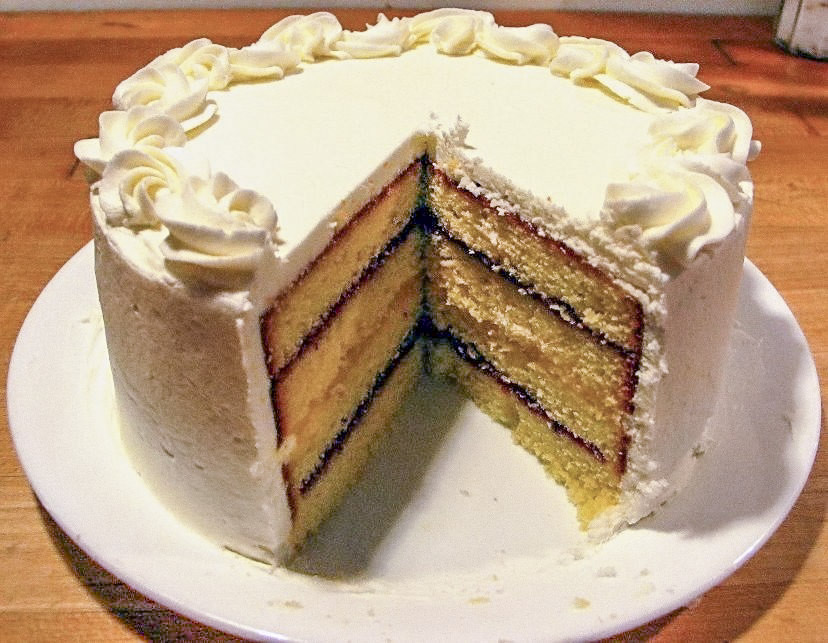

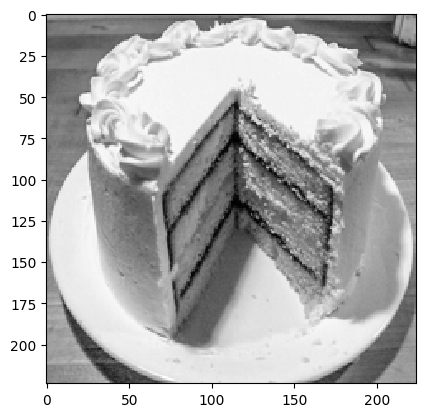

In [42]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image
from keras.models import load_model
from IPython.display import display

#Load model
model = load_model('food_mnist.h5')

#Open image uploaded 
img = Image.open('cake.jpg')

#Display image uploaded
display(img)

#Convert to gray Image
img = img.convert('L')

#Resize to 224x224 image
img = img.resize((224,224))

#Show image
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()

#Convert image to numpy array
img = np.array(img)

#Reshape array to 4D tensor with dimensions (1, 224, 224, 1)
img = img.reshape(1, 224, 224, 1)

#Rescale pixel value from (0, 255) to (0, 1)
img = img.astype('float32')/255

#Get model prediction
#logits = model(img).numpy()[0]

#digit = np.argmax(logits)

#print('Predicted food:', digit)
